**Submitted By:-**

**Anushka Halder** **(V00961967)** <br> 
**Sanjana Arora**   **(V00966221)** <br> 
**Tavanpreet S. Oberoi (V00963163)** <br> 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/Parsed_Chess_Data.csv',index_col=0)

In [ ]:
df.head()

Event  ... MoveCount
1  Rated Classical game  ...        13
2  Rated Classical game  ...        18
3  Rated Classical game  ...        11
4     Rated Bullet game  ...        47
5     Rated Bullet game  ...        23

[5 rows x 16 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9979 entries, 1 to 10000
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Event         9979 non-null   object
 1   White         9979 non-null   object
 2   Black         9979 non-null   object
 3   Result        9979 non-null   object
 4   UTCDate       9979 non-null   object
 5   UTCTime       9979 non-null   object
 6   WhiteOldRank  9979 non-null   int64 
 7   BlackOldRank  9979 non-null   int64 
 8   WhiteNewRank  9979 non-null   int64 
 9   BlackNewRank  9979 non-null   int64 
 10  ECO           9979 non-null   object
 11  Opening       9979 non-null   object
 12  TimeControl   9979 non-null   object
 13  Termination   9979 non-null   object
 14  MoveDetail    9979 non-null   object
 15  MoveCount     9979 non-null   int64 
dtypes: int64(5), object(11)
memory usage: 1.3+ MB


In [ ]:
df.columns

Index(['Event', 'White', 'Black', 'Result', 'UTCDate', 'UTCTime',
       'WhiteOldRank', 'BlackOldRank', 'WhiteNewRank', 'BlackNewRank', 'ECO',
       'Opening', 'TimeControl', 'Termination', 'MoveDetail', 'MoveCount'],
      dtype='object')

In [ ]:
df.isnull().sum()

Event           0
White           0
Black           0
Result          0
UTCDate         0
UTCTime         0
WhiteOldRank    0
BlackOldRank    0
WhiteNewRank    0
BlackNewRank    0
ECO             0
Opening         0
TimeControl     0
Termination     0
MoveDetail      0
MoveCount       0
dtype: int64

**Number** **of distinct players**

In [ ]:
distinct_white = df["White"].unique().tolist()
distinct_black = df["Black"].unique().tolist()
distinct_white.extend(distinct_black)

all_players = []
for player in distinct_white:
    if player not in all_players:
        all_players.append(player)

print("Number of unique Players:", len(all_players))

Number of unique Players: 1406


In [ ]:
# total number of distinct openings
distinct_openings = df['Opening'].unique().tolist()
print("Number of unique openings:", len(distinct_openings))

Number of unique openings: 979


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


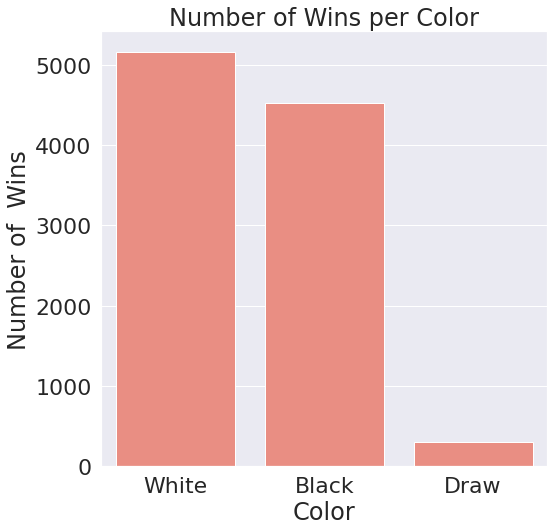

In [ ]:
X = ['White', 'Black', 'Draw']
y = df.Result.value_counts()
sns.set(rc={'figure.figsize':(8,8)})
sns.set(style="darkgrid")
sns.set(font_scale=2)
ax = sns.barplot(X,y, color="salmon")
ax.set(xlabel="Color", ylabel="Number of  Wins")
ax.set_title('Number of Wins per Color');

**Dictionary of opening move corresponding with the number of games having that opening move**

In [ ]:
dict_moves_count = {}
list_moves = [moves[:2] for moves in df["MoveDetail"]]
possible_opening_moves = ["a3", "a4", "b3", "b4", "c3", "c4", "d3", "d4", "e3", "e4", "f3", "f4", "g3", "g4", "h3", "h4", "Nf", "Nh", "Na", "Nc"]


for op_move in possible_opening_moves:
    dict_moves_count[op_move] = list_moves.count(op_move)
print("Count of moves Dictionary:", dict_moves_count)

Count of moves Dictionary: {'a3': 8, 'a4': 3, 'b3': 114, 'b4': 44, 'c3': 93, 'c4': 260, 'd3': 113, 'd4': 2515, 'e3': 412, 'e4': 5859, 'f3': 34, 'f4': 105, 'g3': 151, 'g4': 20, 'h3': 3, 'h4': 12, 'Nf': 196, 'Nh': 0, 'Na': 0, 'Nc': 37}


**Distribution of black and white players ratings**

Text(0.5, 1, 'Rating Distribution of Players')

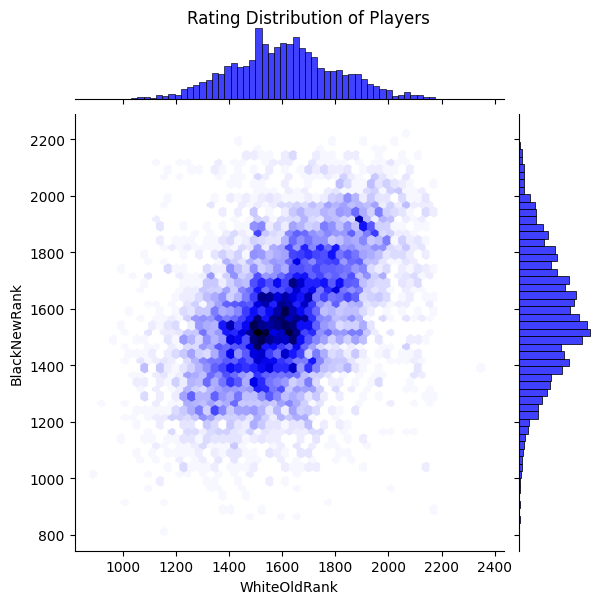

In [ ]:
plt.style.use('default')
title = "Rating Distribution of Players";
ax1 = sns.jointplot(x='WhiteOldRank',y='BlackNewRank',data=df,kind='hex',color='blue')
ax1.fig.suptitle(title, y = 1)

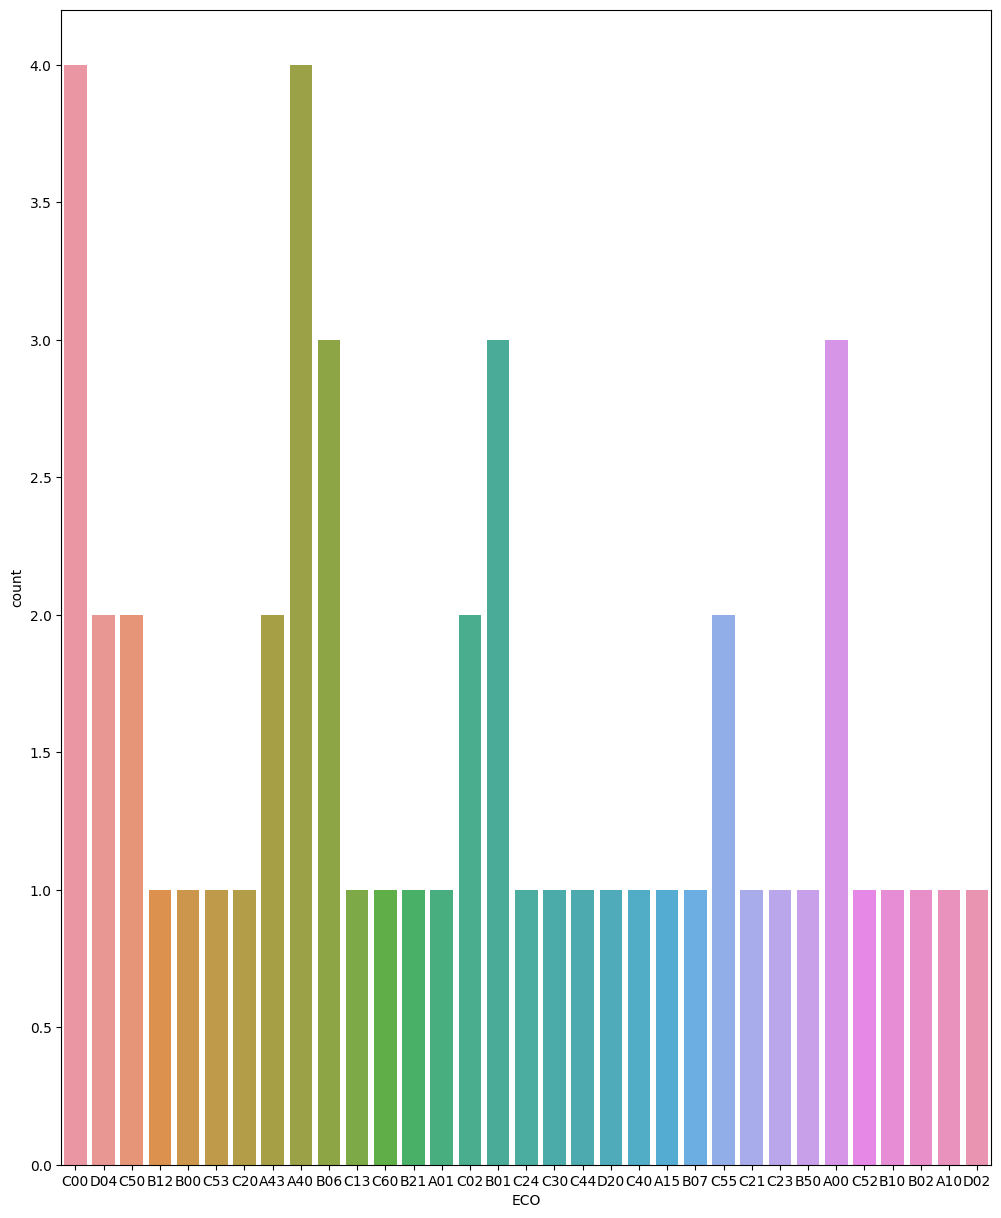

In [ ]:
plt.figure(figsize=(12,15))
sns.countplot(x="ECO", data=df.head(50));

Top 10 players from Black side

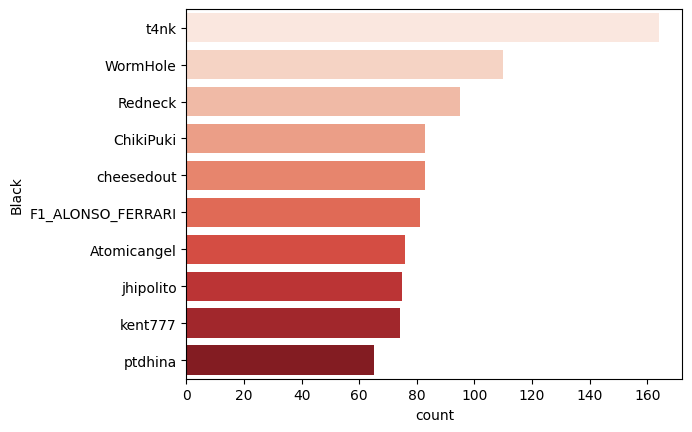

In [ ]:
sns.countplot(y="Black", data=df, palette="Reds",
              order=df.Black.value_counts().iloc[:10].index)

**Result distribution corresponding to ranking groups**

In [ ]:
df['mean_rating'] = (df.WhiteOldRank + df.BlackOldRank) / 2
df['rating_diff'] = abs(df.WhiteOldRank - df.BlackOldRank)

In [ ]:
under_1500 = df[df.mean_rating < 1500]
under_2000 = df[df.mean_rating.between(1500, 2000)]
over_2000 = df[df.mean_rating > 2000]

groups = [under_1500, under_2000, over_2000]
group_titles = [' Rank Under 1500', ' Rank Over 1500 and Under 2000', 'Rank Over 2000']

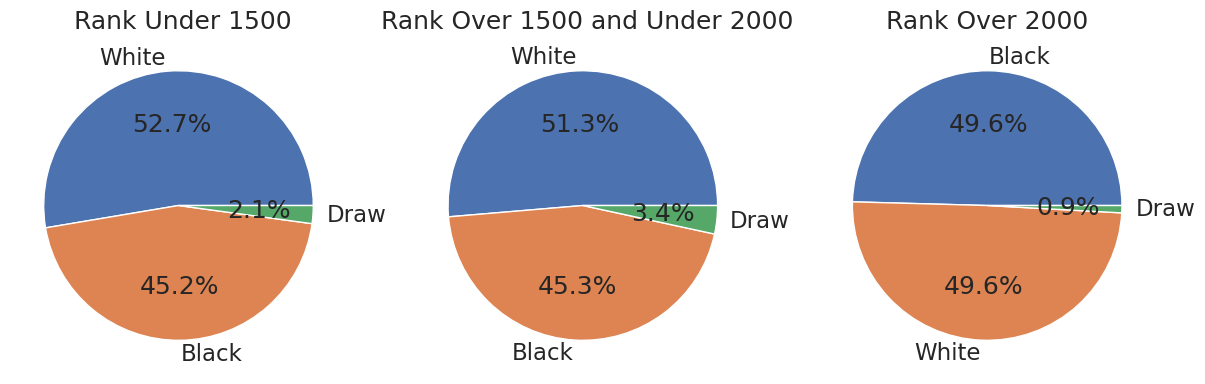

In [ ]:
sns.set(font_scale=1.5)
plt.figure(figsize=(20,20))
for i, group in enumerate(groups):
    Result_id= group.Result.value_counts()
    plt.subplot(1, 4, i+1)
    plt.title(group_titles[i])
    plt.pie(Result_id, labels=Result_id.index, autopct="%.1f%%")

Distribution of the openings played

In [98]:
ddf=pd.read_csv('/content/Parsed_Chess_Data.csv')
opening_dist =ddf["Opening"].unique().tolist()
opening_dist = ddf['Opening'].value_counts().nlargest(10)


Text(0.5, 1.0, 'Spread of Different Openings')

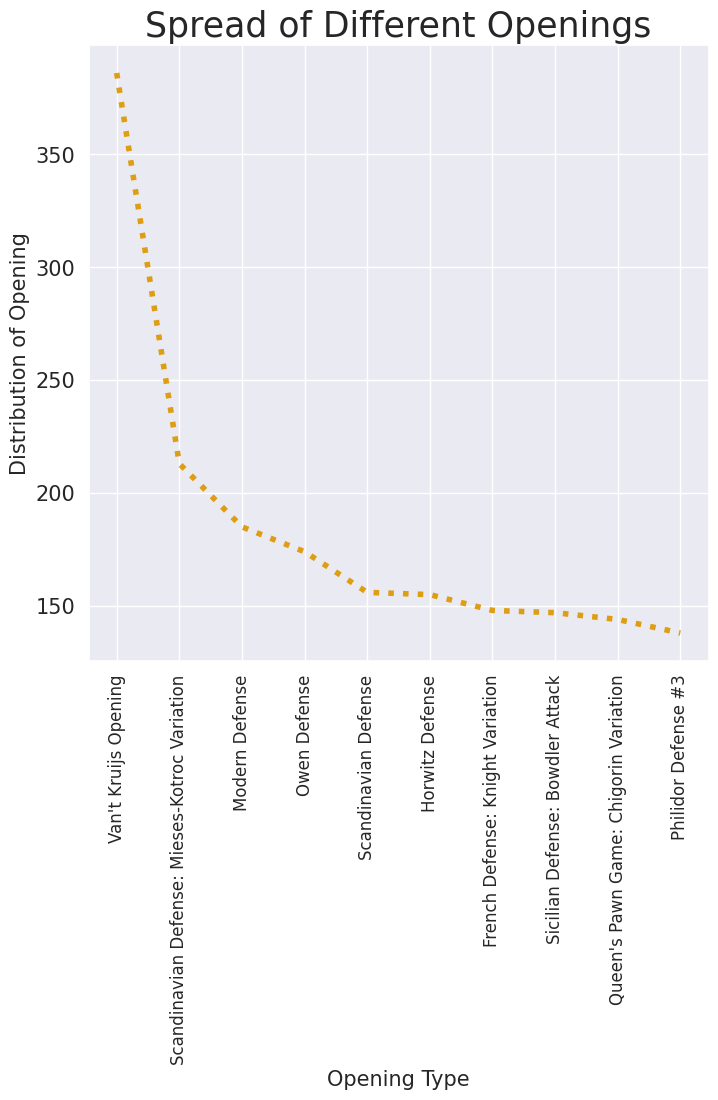

In [99]:
plt.figure(figsize=(8,8))
plt.plot(opening_dist,color='#de9d12',linewidth=4,linestyle=':')
plt.xlabel("Opening Type", fontsize=15)
plt.xticks(rotation=90, fontsize=12)
plt.ylabel("Distribution of Opening", fontsize=15)
plt.yticks(fontsize=15)
plt.title("Spread of Different Openings",fontsize=25)

Count of openings which lead to a Win for Black/ Win for White

Text(0.5, 1.0, 'Maximum Wins in each Opening')

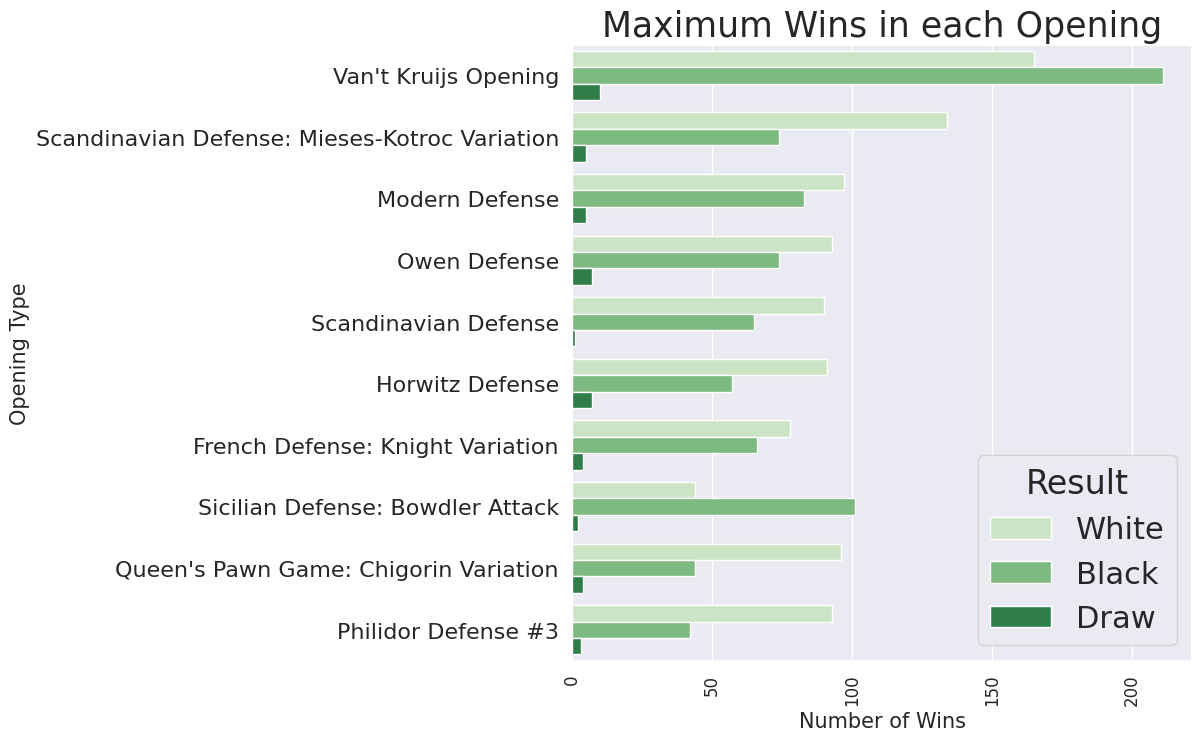

In [100]:
plt.figure(figsize=(8,8))
sns.set(font_scale=2)

sns.countplot(y='Opening',hue='Result',data=ddf,order=ddf.Opening.value_counts().iloc[:10].index,palette="Greens")
plt.ylabel("Opening Type", fontsize=15)
plt.xticks(rotation=90, fontsize=12)
plt.xlabel("Number of Wins", fontsize=15)
plt.yticks(fontsize=16)
plt.title("Maximum Wins in each Opening",fontsize=25)

How is the white rating distributed over the event

Text(0.5, 1.0, 'Distrubution of White Ratings in each Event Type')

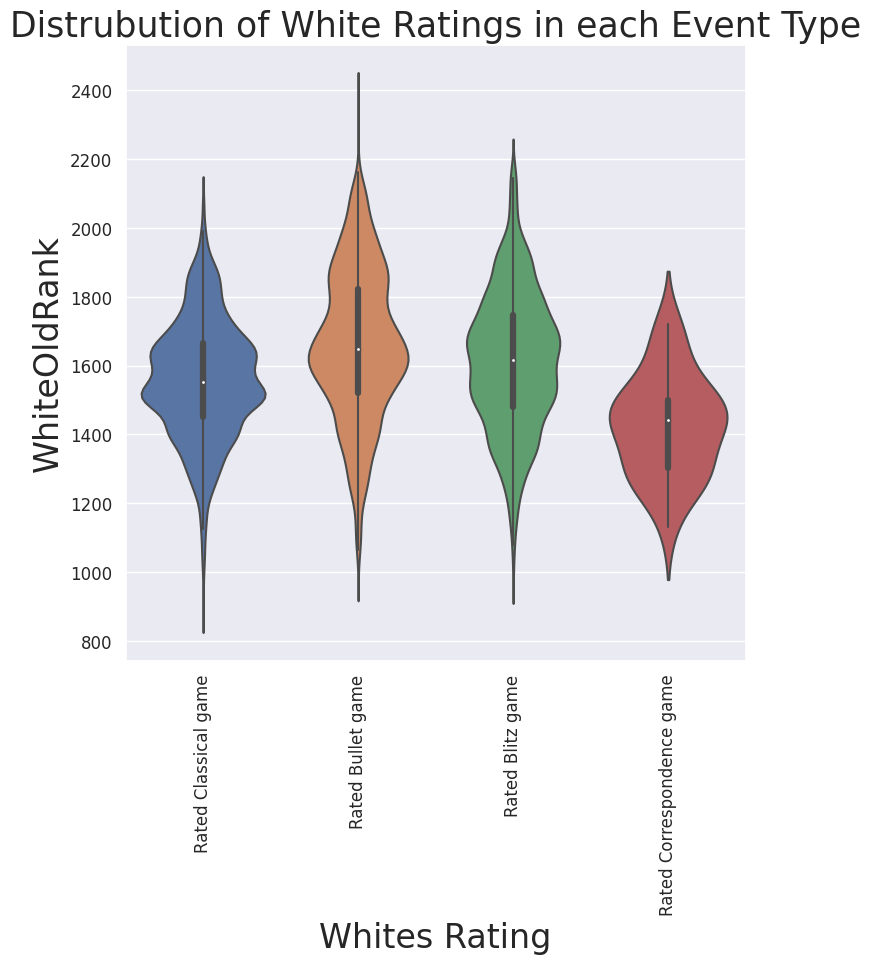

In [101]:
plt.figure(figsize=(8,8))
sns.set(font_scale=2)
sns.violinplot(data=ddf, x='Event', y='WhiteOldRank', inner='box');
plt.xlabel('Event')
plt.xlabel('Whites Rating');
plt.xticks(rotation=90, fontsize=12)
plt.yticks( fontsize=12)
plt.title("Distrubution of White Ratings in each Event Type",fontsize=25)

How is the Blacks rating distributed over the each event type

(array([ 600.,  800., 1000., 1200., 1400., 1600., 1800., 2000., 2200.,
        2400.]), <a list of 10 Text major ticklabel objects>)

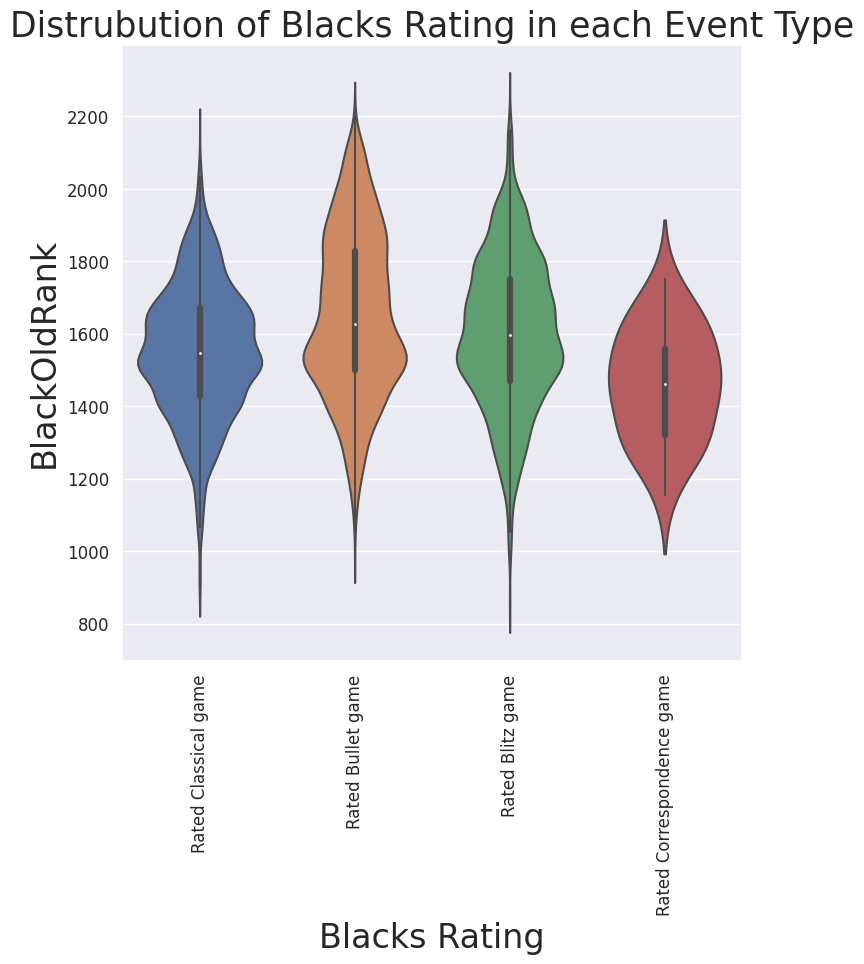

In [102]:
plt.figure(figsize=(8,8))
sns.set(font_scale=2)
plt.title("Distrubution of Blacks Rating in each Event Type",fontsize=25)
sns.violinplot(data=ddf, x='Event', y='BlackOldRank', inner='box',
             style ="box");
plt.xlabel('Event')
plt.xlabel('Blacks Rating');
plt.xticks(rotation=90, fontsize=12)
plt.yticks( fontsize=12)

How is termination related to the Game Category(Event)

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500.]),
 <a list of 8 Text major ticklabel objects>)

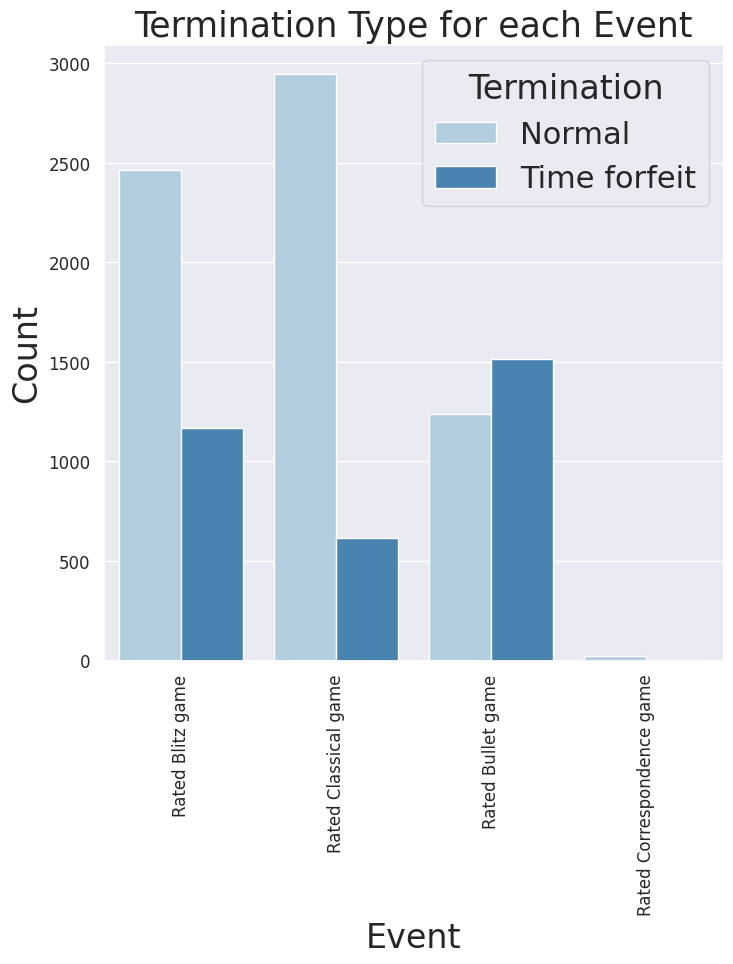

In [103]:
plt.figure(figsize=(8,8))
sns.set(font_scale=2)
plt.title("Termination Type for each Event",fontsize=25)
sns.countplot(x='Event',hue='Termination',data=ddf,order=ddf.Event.value_counts().iloc[:20].index,palette="Blues")
plt.xlabel('Event')
plt.ylabel('Count');
plt.xticks(rotation=90, fontsize=12)
plt.yticks( fontsize=12)